# Phishing Website HTML Classification
## Full HTML files showing example Phishing and Non-Phishing Websites
Total Number of
Trainable Parameters
412,388,597 
not available metrics
Pre-processing in separate file

In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
df = pd.read_csv('data_training.csv')


X = df.loc[:, df.columns != "class"]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train.head())
print(X_test.head())

(6320, 9) (6320,)
(1580, 9) (1580,)
      Happy  Angry  Surprise   Sad  Fear  no_words  no_misspelled  \
7876   0.00   0.00      0.29  0.14  0.57        82       0.231707   
7082   0.00   0.00      0.00  0.00  1.00        69       3.884058   
3733   0.25   0.00      0.00  0.50  0.25        15       1.000000   
4975   0.15   0.08      0.00  0.08  0.69        88       0.284091   
7536   0.00   0.00      0.00  0.00  1.00         6       2.000000   

      readability  unique_words  
7876        68.06            52  
7082        79.77            23  
3733        63.86            15  
4975        62.07            63  
7536        90.77             4  
      Happy  Angry  Surprise   Sad  Fear  no_words  no_misspelled  \
2611   0.06   0.02      0.14  0.11  0.67      1638       0.015873   
2101   0.10   0.08      0.28  0.19  0.36      3807       0.008143   
1235   0.07   0.04      0.24  0.30  0.35      1116       0.022401   
5716   0.00   0.00      0.00  0.00  1.00       314       0.082803   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7900 entries, 0 to 7899
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Happy          7900 non-null   float64
 1   Angry          7900 non-null   float64
 2   Surprise       7900 non-null   float64
 3   Sad            7900 non-null   float64
 4   Fear           7900 non-null   float64
 5   no_words       7900 non-null   int64  
 6   no_misspelled  7900 non-null   float64
 7   readability    7900 non-null   float64
 8   unique_words   7900 non-null   int64  
 9   class          7900 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 617.3 KB
None
   Happy  Angry  Surprise   Sad  Fear  no_words  no_misspelled  readability  \
0   0.19   0.06      0.19  0.11  0.44      2422       0.016102        39.26   
1   0.00   0.00      0.00  0.50  0.50       363       1.647383      -253.66   
2   0.17   0.02      0.18  0.08  0.55      1841       0.015752        5

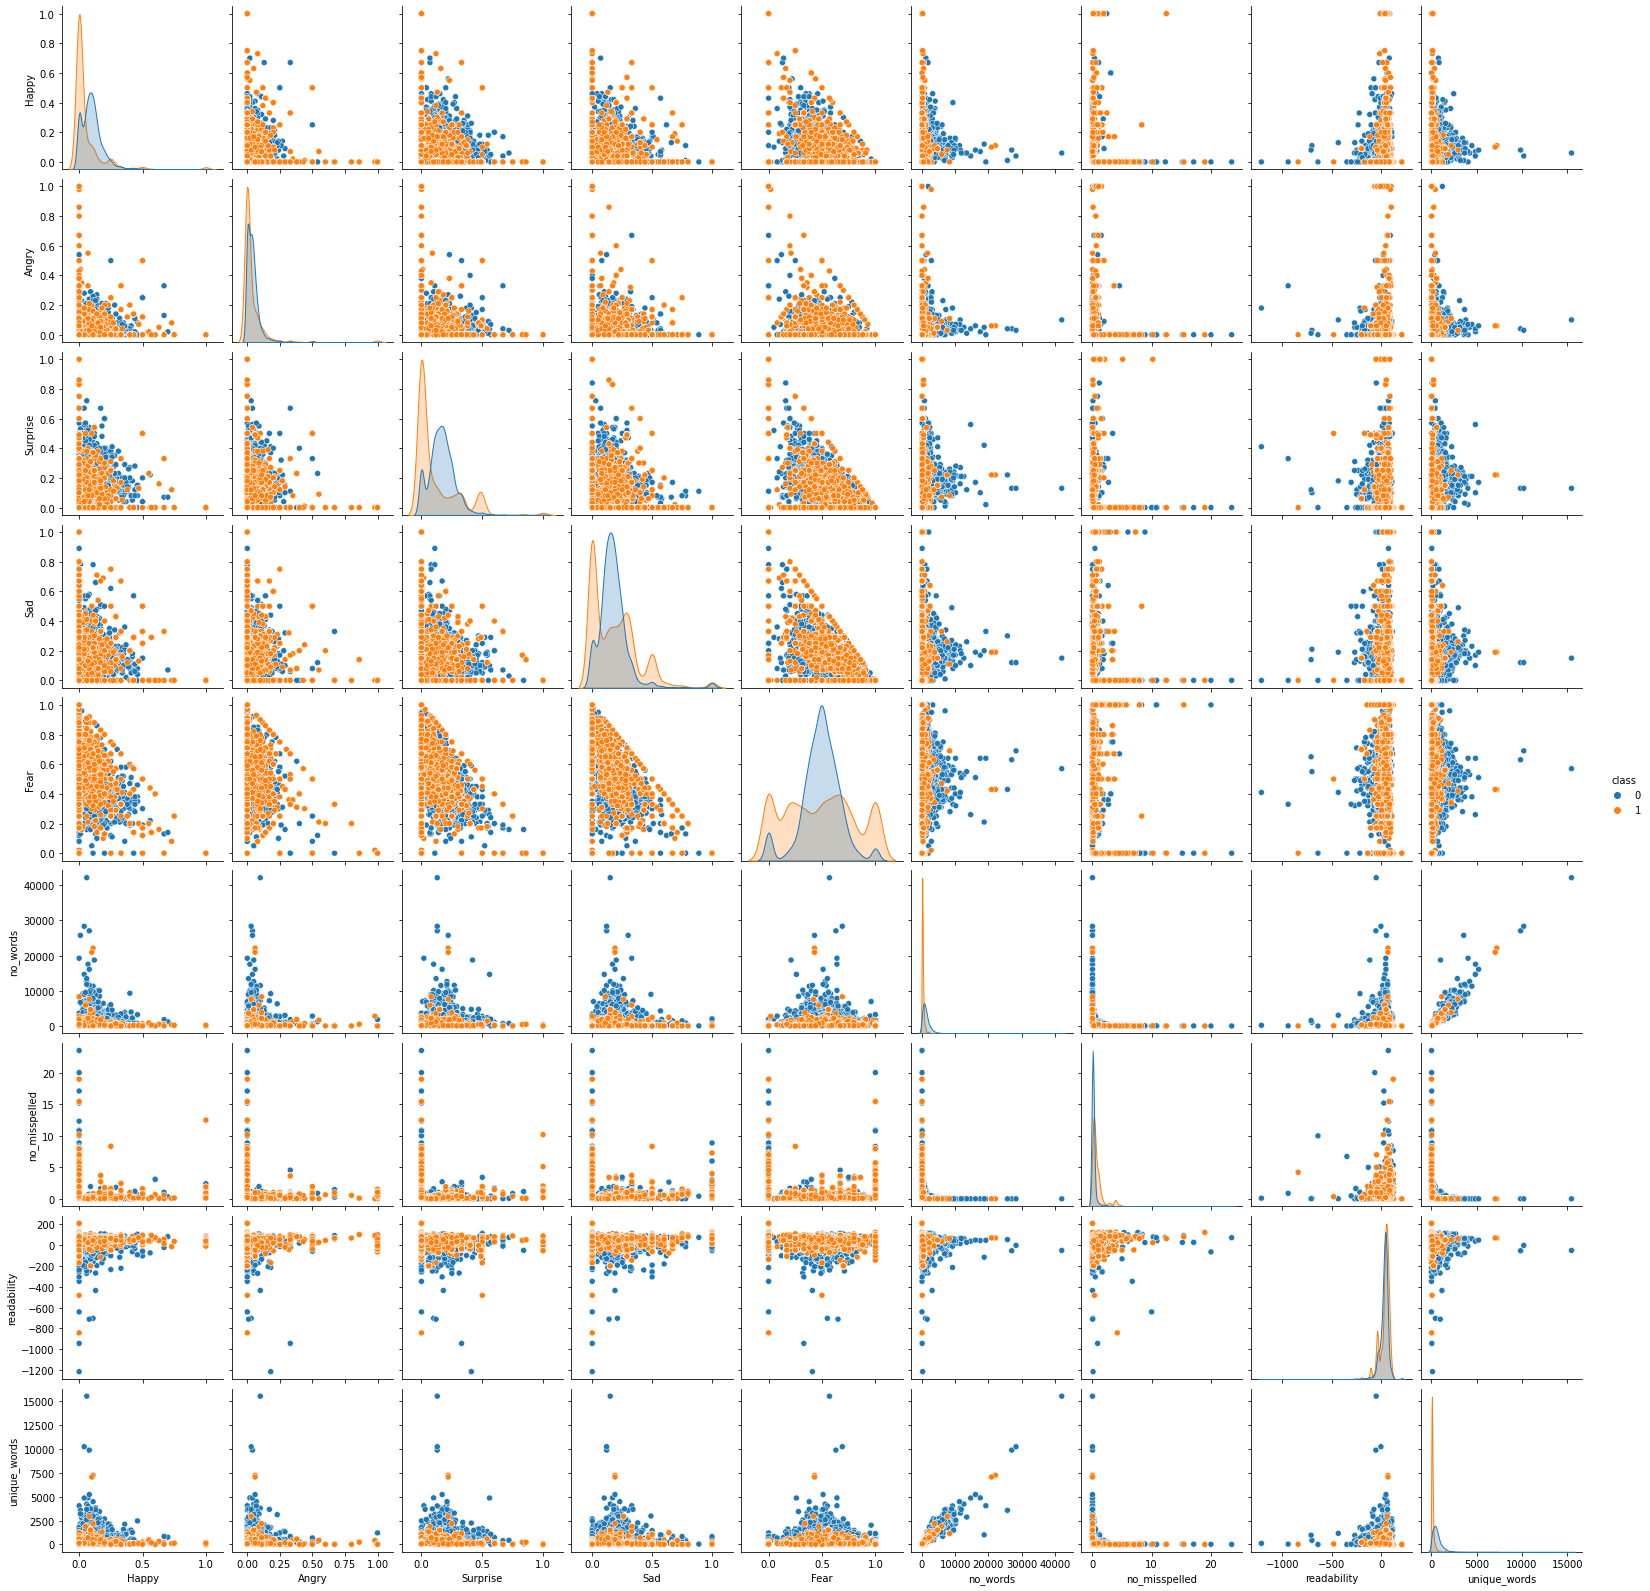

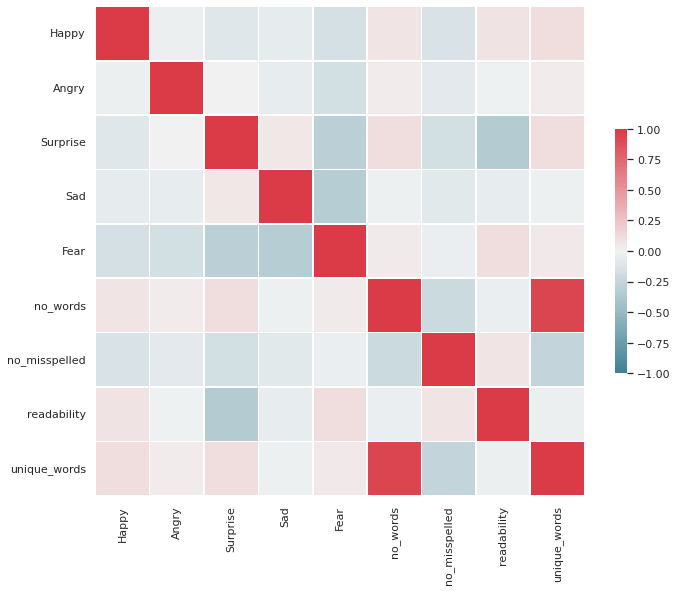

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data_training.csv')

print(df.info())
print(df.head())

sns.pairplot(df, hue='class')
plt.show()

corr = df.loc[:, df.columns != "class"].corr()

sns.set(style="darkgrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()


# unique_words → unique_words%

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

In [4]:
kfold = StratifiedKFold(n_splits=5)

pipeline1 = Pipeline([('classifier', SVC(probability=True))])

param_grid_1 = { # {'classifier__C': 1, 'classifier__gamma': 0.01}
#           'preprocessing': [StandardScaler(), None], # too much time :(
            'classifier__gamma': [0.001, 0.01, 0.1],
            'classifier__C': [0.1, 1, 10]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_



{'classifier__C': 1, 'classifier__gamma': 0.01}

In [7]:


pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))]) 

param_grid_2 = {'preprocessing': [StandardScaler(), None], #scaller
#              'classifier__C': [0.01, 0.1, 1, 10, 100],
#              'classifier__coef0': [0.01, 0.1, 1, 10],
             'classifier__degree': [1, 2, 3, 4, 5]} # 1
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_



{'classifier__degree': 1, 'preprocessing': StandardScaler()}

In [ ]:

'''
pipeline_3 = Pipeline([('preprocessing', None), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_3 = { # more than 4 h
#            'preprocessing': [StandardScaler(), None],
            'classifier__C': [1] # [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

'''

In [8]:
pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True) 
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 0.1, 'preprocessing': None}

In [9]:
pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier(n_jobs=-1))])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__p': [1, 2, 10, 100]
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_


{'classifier__p': 1, 'preprocessing': StandardScaler()}

In [10]:


pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20, 30, 40, 80, 100, 110, 120, 130, 140, 160, 180, 200],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100, 130, 150, 160, 170, 180, 200, 250, 300],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_



{'classifier__max_depth': 30,
 'classifier__max_leaf_nodes': 170,
 'preprocessing': None}

In [37]:
pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50, 60, 80, 100],
            'classifier__max_leaf_nodes' : [16, 32, 64, 128, 256, 512, 1024], #[2, 4, 8, 
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__max_leaf_nodes': 1024,
 'classifier__n_estimators': 100,
 'preprocessing': StandardScaler()}

In [35]:
#from sklearn.model_selection import GridSearchCV
import xgboost as xgb
PARAMETERS = {"subsample":[0.75, 1, 1.25, 1.5],
              "colsample_bytree":[0.75, 1, 1.25],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}


model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(X_train,y_train) # ,early_stopping_rounds=10, eval_metric="error") # ,eval_set=eval_set,verbose=0)

print(model_gs.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
648 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", li

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


In [41]:


from sklearn import metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
#models.append(('SVM linear', grid_3.best_estimator_))
models.append(('Logistic regression', grid_4.best_estimator_))
#models.append(('LinearSVC', grid_5.best_estimator_))
models.append(('KNeighborsClassifier', grid_6.best_estimator_))
models.append(('DecisionTreeClassifier', grid_7.best_estimator_))
models.append(('RandomForestClassifier', grid_8.best_estimator_))
models.append(('XGB', model_gs.best_estimator_))
models.append(('MLPClassifier', grid_13.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'LinearSVC'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))        
    else:    
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))



In [63]:
print(precision_score)
print(recall_score)
print(f1_score)
print(accuracy_score)
print(roc_auc_score)

[0.9232643118148599, 0.7909371781668383, 0.801255230125523, 0.88, 0.8946135831381733, 0.9278959810874704, 0.9154929577464789, 0.8921453692848769]
[0.8896713615023474, 0.9014084507042254, 0.8990610328638498, 0.903755868544601, 0.8967136150234741, 0.9213615023474179, 0.9154929577464789, 0.8931924882629108]
[0.9061566049013747, 0.8425671969281404, 0.8473451327433629, 0.8917197452229301, 0.895662368112544, 0.9246171967020024, 0.9154929577464789, 0.8926686217008798]
[0.9006329113924051, 0.8183544303797469, 0.8253164556962025, 0.8816455696202532, 0.8873417721518987, 0.9189873417721519, 0.9088607594936708, 0.8841772151898735]
[0.9217556944229478, 0.8708380088221637, 0.8824243538151988, 0.9371549811690657, 0.8981259350977662, 0.9708773474178405, 0.9680873703761027, 0.9375515916008875]


In [64]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM poly', 'Logistic regression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 
                                         'RandomForestClassifier', 'XGB', 'MLPClassifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM rbf,0.923264,0.889671,0.906157,0.900633,0.921756
1,SVM poly,0.790937,0.901408,0.842567,0.818354,0.870838
2,Logistic regression,0.801255,0.899061,0.847345,0.825316,0.882424
3,KNeighborsClassifier,0.880000,0.903756,0.891720,0.881646,0.937155
4,DecisionTreeClassifier,0.894614,0.896714,0.895662,0.887342,0.898126
5,RandomForestClassifier,0.927896,0.921362,0.924617,0.918987,0.970877
6,XGB,0.915493,0.915493,0.915493,0.908861,0.968087
7,MLPClassifier,0.892145,0.893192,0.892669,0.884177,0.937552


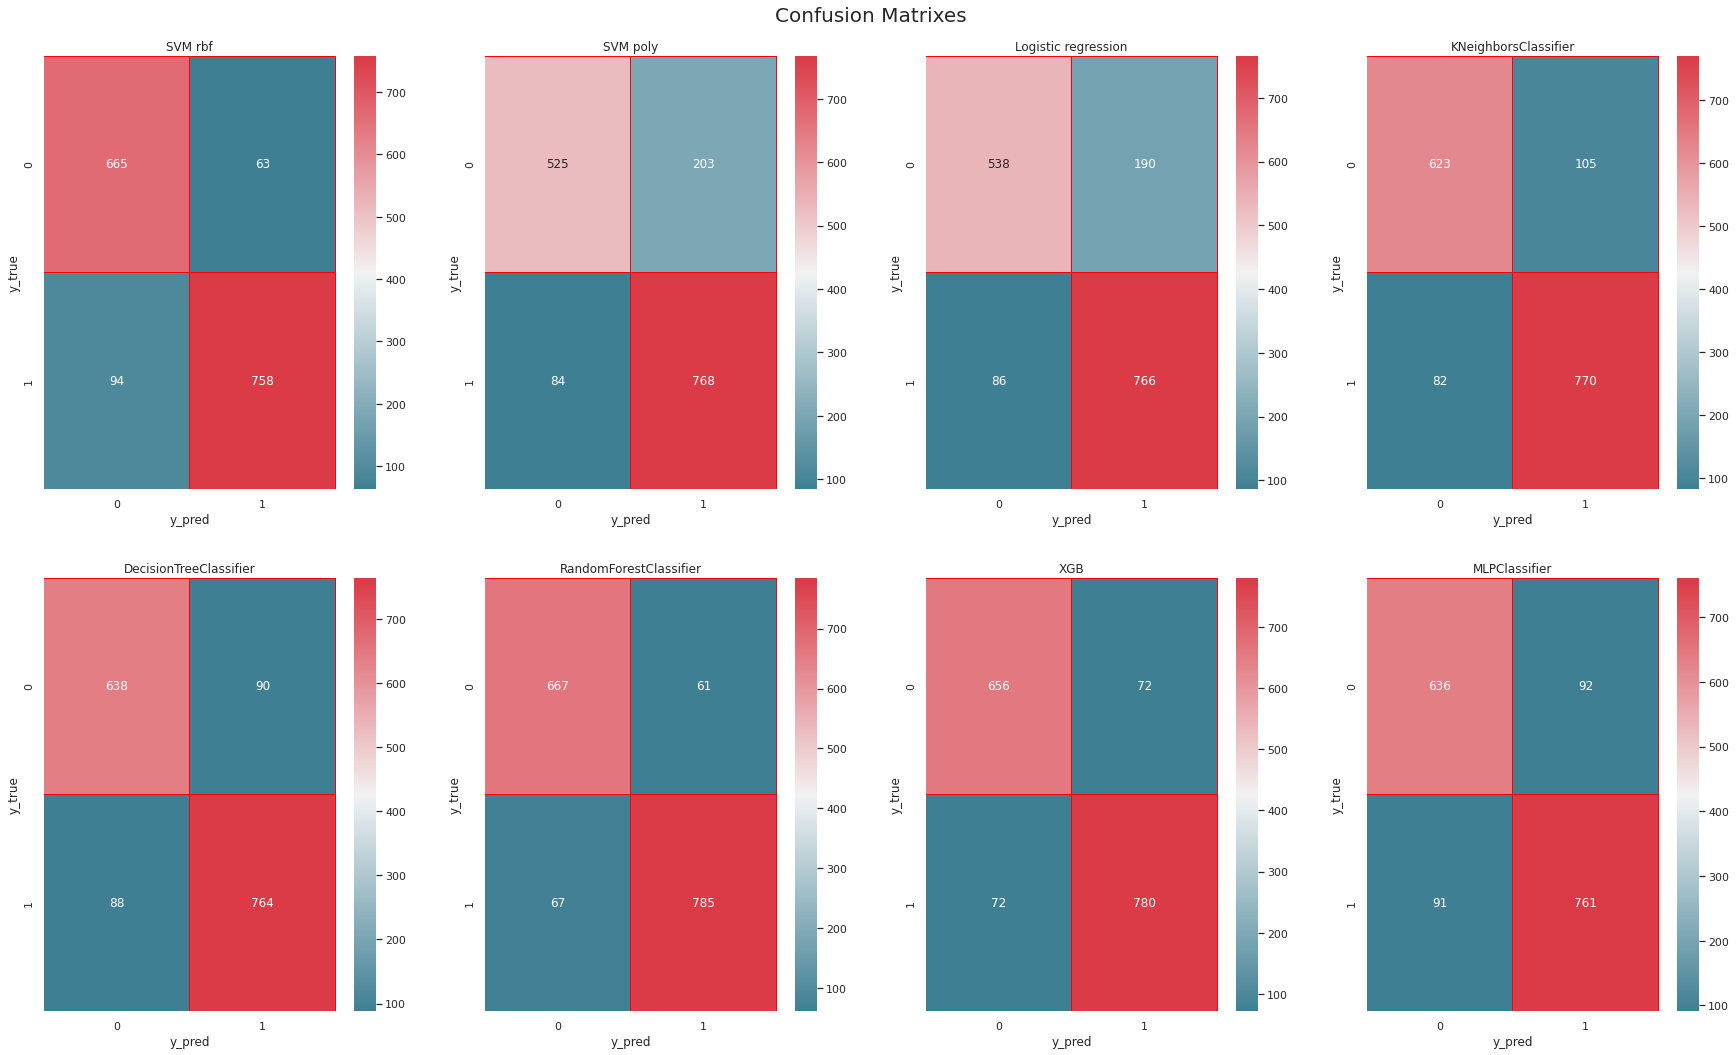

In [66]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(2, 4, figsize=(25,15))

i = 0
j = 0

for name, model in models:
  cm = confusion_matrix(y_test, model.predict(X_test))
  sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",cmap=cmap,fmt=".0f",ax=axs[i,j])
  axs[i,j].set_title(name)
  j=j+1
  if j == 4:
    i=i+1
    j=0  

for ax in axs.flat:
    ax.set(xlabel='y_pred', ylabel='y_true')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle("Confusion Matrixes", fontsize=20, verticalalignment='bottom')
fig.show()

In [15]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [40]:


pipeline_13 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_13 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.0001, 0.001, 0.01],
            'classifier__max_iter': [700], #[100, 500, 1000], # 500 za mało GridSearch po maxiter nie ma sensu
#            'classifier__batch_size': [8, 16,32],
}

grid_13 = GridSearchCV(pipeline_13, param_grid_13, cv=kfold, return_train_score=True)

grid_13.fit(X_train, y_train)
grid_13.best_params_



{'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.01,
 'classifier__max_iter': 700,
 'preprocessing': StandardScaler()}

In [56]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import History
from keras import backend

backend.clear_session()

history = History()

model = Sequential()
model.add(Dense(100,activation="sigmoid",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.08)) # dropout influence
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [57]:


model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])



In [61]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=350)

Epoch 1/350
198/198 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.8503 - val_loss: 0.3516 - val_accuracy: 0.8595
Epoch 2/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8487 - val_loss: 0.3527 - val_accuracy: 0.8544
Epoch 3/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8522 - val_loss: 0.3660 - val_accuracy: 0.8513
Epoch 4/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3561 - accuracy: 0.8522 - val_loss: 0.3509 - val_accuracy: 0.8608
Epoch 5/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8489 - val_loss: 0.3454 - val_accuracy: 0.8570
Epoch 6/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8513 - val_loss: 0.3527 - val_accuracy: 0.8538
Epoch 7/350
198/198 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8497 - val_loss: 0.3671 - val_accuracy: 0.8557

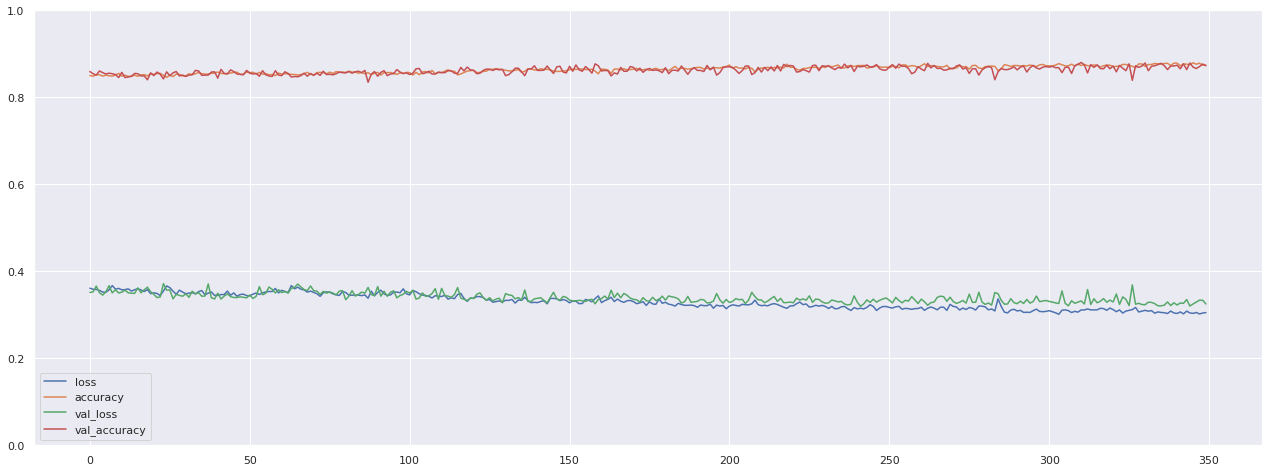

In [62]:
pd.DataFrame(history.history).plot(figsize=(22, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()